Here's Allen Downey's article: http://allendowney.blogspot.fr/2011/08/jimmy-nut-company-problem.html

> “Jimmy Nut Company advertises that their nut mix contains 40% cashews, 15% brazil nuts, 20% almonds, and only 25% peanuts. The truth in advertising investigators took a random sample (of size 20 lb) of the nut mix and found the distribution to be as follows:

>Cashews  Brazil Nuts  Almonds  Peanuts

>6 lb     3 lb         5 lb     6 lb

>At the 0.01 level of significance, is the claim made by Jimmy Nuts true?”

In [1]:
weights = {'Cashew': (16+18)/2, 
           'Brazil nut': (6+8)/2, 
           'Almonds': (20+24)/2, 
           'Peanuts': 28.}

Converting from weight in the sample to count per ounce.

In [2]:
def ConvertToCount(sample, count_per):
    """Convert from weight to count.

    sample: Hist that maps from category to weight in pounds
    count_per: dict that maps from category to count per ounce
    """
    for value, count in sample.Items():
        sample.Mult(value, 16 * count_per[value])

In [3]:
sample = dict(cashew=6, brazil=3, almond=5, peanut=6)
count_per = dict(cashew=17, brazil=7, 
                     almond=22, peanut=28)

In [4]:
count_per

{'almond': 22, 'brazil': 7, 'cashew': 17, 'peanut': 28}

In [5]:
from thinkstats2 import MakeHistFromDict, MakePmfFromDict

observed = MakeHistFromDict(sample)
ConvertToCount(observed, count_per)

In [6]:
observed

Hist({'cashew': 1632, 'brazil': 336, 'almond': 1760, 'peanut': 2688})

In [7]:
advertised = dict(cashew=40, brazil=15, 
                      almond=20, peanut=25)

In [8]:
expected = MakePmfFromDict(advertised)
ConvertToCount(expected, count_per)

In [9]:
expected

Pmf({'cashew': 108.80000000000001, 'brazil': 16.8, 'almond': 70.4, 'peanut': 112.0})

In [10]:
expected.Normalize(observed.Total())

308.0

In [11]:
expected

Pmf({'cashew': 2266.431168831169, 'brazil': 349.9636363636364, 'almond': 1466.514285714286, 'peanut': 2333.090909090909})

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame([expected.GetDict(), observed.GetDict()]).transpose()
df.columns = ['expected', 'observed']
df['error'] = (df.observed - df.expected) / df.expected * 100
df

,expected,observed,error
almond,1466.514286,1760.0,20.012469
brazil,349.963636,336.0,-3.990025
cashew,2266.431169,1632.0,-27.992519
peanut,2333.090909,2688.0,15.211970


Let's compute the chi-square of this:

In [50]:
def chi_square(expected_dict, observed_dict):
    """Computes the chi squared statistic."""
    chi = 0
    for key in expected_dict:
        a, b = observed_dict[key], expected_dict[key]
        chi += (a-b)**2/b
    return chi

In [62]:
test_stat = chi_square(expected.GetDict(), observed.GetDict())
test_stat

290.8728179551123

In [52]:
from thinkstats2 import MakeCdfFromHist, MakeHistFromList

In [53]:
num_nuts = observed.Total()
cdf = MakeCdfFromHist(expected)
t = cdf.Sample(num_nuts)
simulated = MakeHistFromList(t)
chi2 = chi_square(expected.GetDict(), simulated.GetDict())
chi2

3.657641282822343

Let's do that many times now!

In [55]:
import tqdm

In [64]:
chi2s = []
for _ in tqdm.tqdm(range(5000)):
    t = cdf.Sample(num_nuts)
    simulated = MakeHistFromList(t)
    chi2 = chi_square(expected.GetDict(), simulated.GetDict())
    chi2s.append(chi2)

100%|██████████| 5000/5000 [00:18<00:00, 273.41it/s]


In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

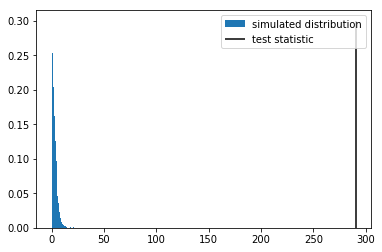

In [67]:
plt.hist(chi2s, bins=50, normed=True, label='simulated distribution');
plt.vlines(test_stat, 0, 0.3, label='test statistic')
plt.legend()

So indeed, it seems unlikely that the observed distribution has been drawn from our generative model. Great post by Allen!